# Print a multidimensionnal (X,Y) sample

https://github.com/openturns/openturns/issues/1749

In [1]:
import openturns as ot

In [2]:
model = ot.SymbolicFunction(
    ["X0", "X1", "X2"],
    ["1.0 + 2.0 * X0 - 1.0 * X1 + 4.0 * X2", "-2.0 - 3.0 * X0 + 5.0 * X1 - 1.0 * X2"],
)

In [3]:
distribution = ot.Normal(3)
distribution.setDescription(model.getInputDescription())
sampleX = distribution.getSample(100)
sampleY = model(sampleX)

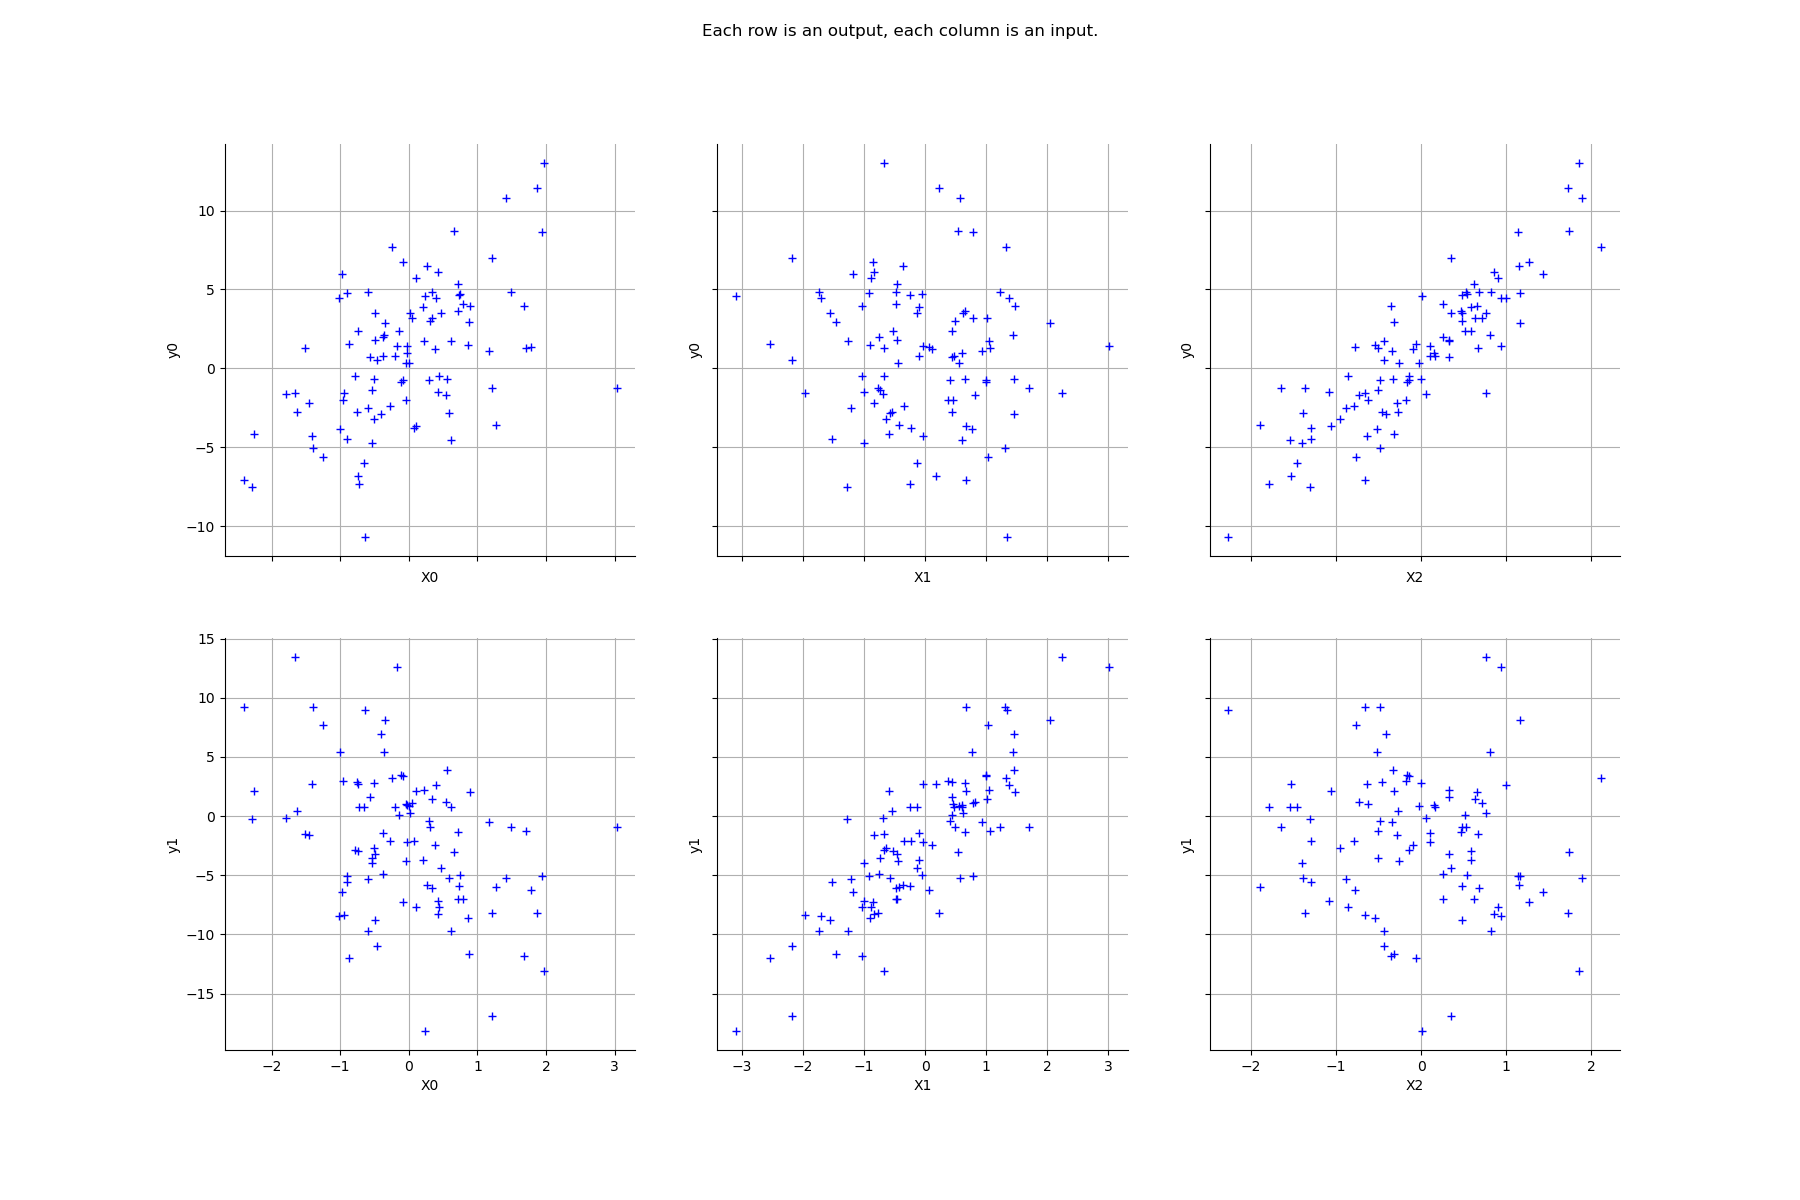

In [4]:
dimensionX = sampleX.getDimension()
dimensionY = sampleY.getDimension()
descriptionX = sampleX.getDescription()
descriptionY = sampleY.getDescription()

grid = ot.GridLayout(dimensionY, dimensionX)
for j in range(dimensionY):
    for i in range(dimensionX):
        graph = ot.Graph("", descriptionX[i], descriptionY[j], True, "",)
        cloud = ot.Cloud(sampleX[:, i], sampleY[:, j])
        graph.add(cloud)
        grid.setGraph(j, i, graph)
grid.setTitle("Each row is an output, each column is an input.")
grid